In [15]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

#datadir = r'D:\measuring\analysis_data\delayline'
#ssro_calib_folder = r'D:\measuring\analysis_data\delayline\20170224\120011_SSRO_calib_MWInit_Pippin_SIL3_SSROCalibration_MWInit'

ssro_calib_folder = r'D:\measuring\data\20170224\120011_SSRO_calib_MWInit_Pippin_SIL3_SSROCalibration_MWInit'
datadir=None

## First calibrate the SSRO and MW pulses

## T2 (Hahn echo) timed by AWG (no triggers)

(0.0, 1.0)

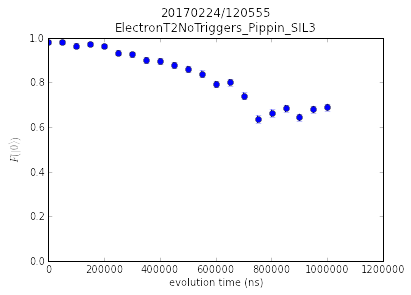

In [16]:
### no RO correction

prev_timestamp = r"20170227000000"

folder= tb.latest_data('ElectronT2NoTriggers', folder=datadir, older_than=prev_timestamp)
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC(ssro_calib_folder=ssro_calib_folder)
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0, 1.0)

## Defocussing offset using self-trigger - stitched

['d:\\measuring\\data\\20170224\\120736_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\121018_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\121303_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\121539_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\121829_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\122129_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\122409_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\122653_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\122940_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\123217_ElectronRefocussingTriggered_OneTrigger_Pippin_SIL3']


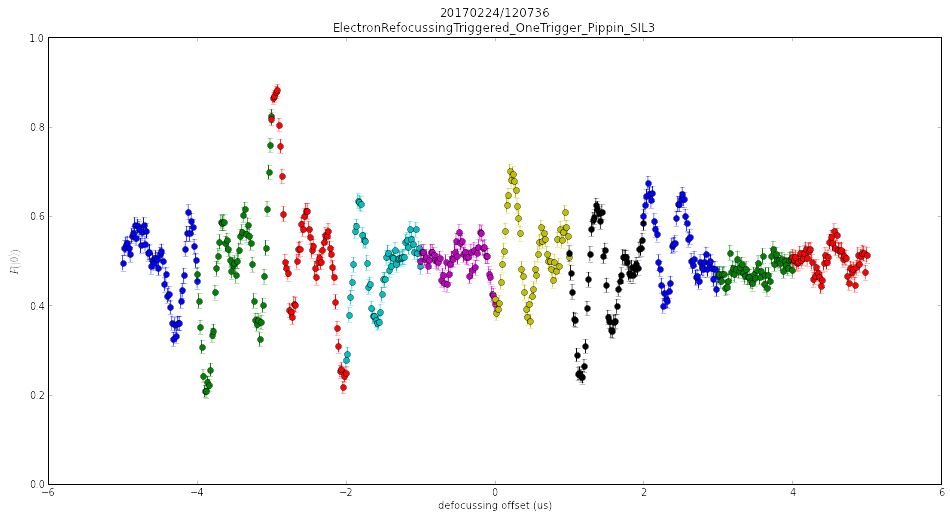

In [17]:
### stitched

num_msmts = 10
msmt_folders = []

prev_timestamp = r"20170227000000"

for i in range(num_msmts):
    next_folder = tb.latest_data('ElectronRefocussingTriggered_OneTrigger', folder=datadir, older_than=prev_timestamp)
    prev_timestamp = "".join(tb.get_date_time_string_from_folder(next_folder))
    
    msmt_folders.insert(0, next_folder)

print(msmt_folders)

ax = None

stitched_DELAYT_sweep_pts = list()
stitched_DELAYT_p0 = list()
stitched_DELAYT_u_p0 = list()

for folder in msmt_folders:
    a = sequence.SequenceAnalysis(folder)
    a.get_sweep_pts()
    a.get_readout_results(name='ssro')
    a.get_electron_ROC(ssro_calib_folder=ssro_calib_folder)
    ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro', ax=ax)
    
    stitched_DELAYT_sweep_pts += a.sweep_pts.tolist()
    stitched_DELAYT_p0 += a.p0.tolist()
    stitched_DELAYT_u_p0 += a.u_p0.tolist()
    
stitched_DELAYT_sweep_pts = np.array(stitched_DELAYT_sweep_pts)
stitched_DELAYT_p0 = np.array(stitched_DELAYT_p0)
stitched_DELAYT_u_p0 = np.array(stitched_DELAYT_u_p0)

ax.set_ylim(0.0,1.0)
plt.gcf().set_size_inches(16,8)
# a=sequence.SequenceAnalysis(folder)
# a.get_sweep_pts()
# a.get_readout_results(name='ssro')
# a.get_electron_ROC()
# ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
# ax.set_ylim(0.0, 1.0)

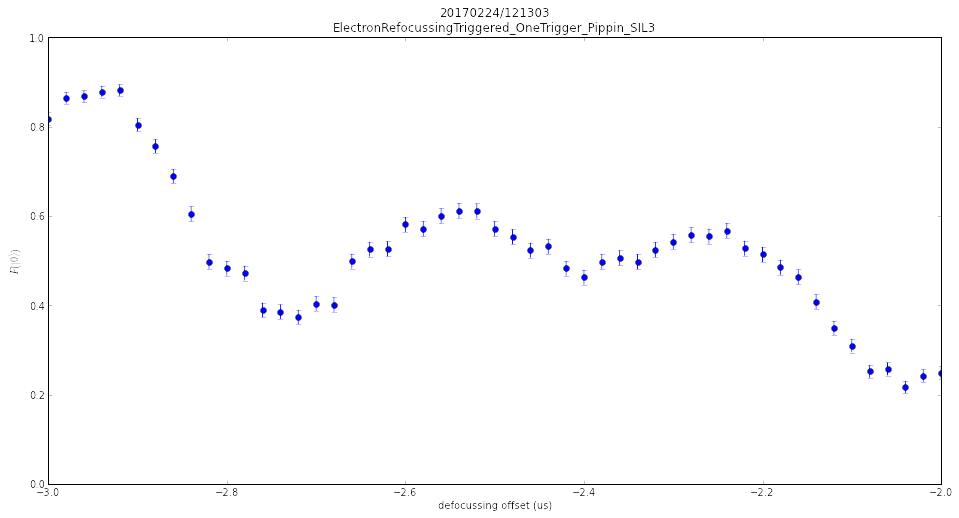

In [18]:
max_msmt = 2

a = sequence.SequenceAnalysis(msmt_folders[max_msmt])
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC(ssro_calib_folder=ssro_calib_folder)
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')

ax.set_ylim(0.0,1.0)
plt.gcf().set_size_inches(16,8)

## Defocussing offset using AWG timing - stitched

['d:\\measuring\\data\\20170224\\123458_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\123732_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\124653_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\124939_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\125215_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\125455_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\125728_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\130004_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\130241_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3', 'd:\\measuring\\data\\20170224\\130517_ElectronRefocussingTriggered_NoTrigger_Pippin_SIL3']


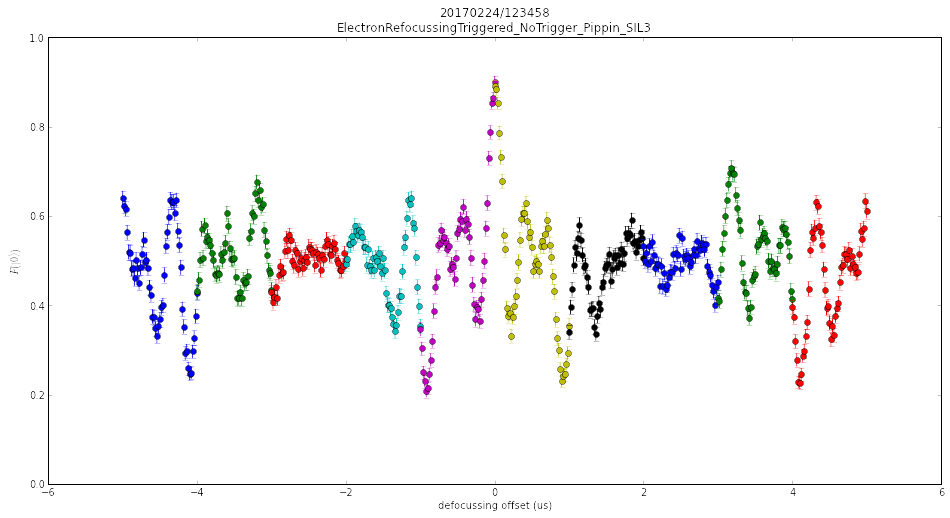

In [19]:
### stitched

num_msmts = 10
msmt_folders = []

prev_timestamp = r"20170227000000"

for i in range(num_msmts):
    next_folder = tb.latest_data('ElectronRefocussingTriggered_NoTrigger', folder=datadir, older_than=prev_timestamp)
    prev_timestamp = "".join(tb.get_date_time_string_from_folder(next_folder))
    
    msmt_folders.insert(0, next_folder)

print(msmt_folders)

ax = None

stitched_AWGT_sweep_pts = list()
stitched_AWGT_p0 = list()
stitched_AWGT_u_p0 = list()

for folder in msmt_folders:
    a = sequence.SequenceAnalysis(folder)
    a.get_sweep_pts()
    a.get_readout_results(name='ssro')
    a.get_electron_ROC(ssro_calib_folder=ssro_calib_folder)
    ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro', ax=ax)
    
    stitched_AWGT_sweep_pts += a.sweep_pts.tolist()
    stitched_AWGT_p0 += a.p0.tolist()
    stitched_AWGT_u_p0 += a.u_p0.tolist()
    
stitched_AWGT_sweep_pts = np.array(stitched_AWGT_sweep_pts)
stitched_AWGT_p0 = np.array(stitched_AWGT_p0)
stitched_AWGT_u_p0 = np.array(stitched_AWGT_u_p0)

ax.set_ylim(0.0,1.0)
plt.gcf().set_size_inches(16,8)
# a=sequence.SequenceAnalysis(folder)
# a.get_sweep_pts()
# a.get_readout_results(name='ssro')
# a.get_electron_ROC()
# ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
# ax.set_ylim(0.0, 1.0)

In [20]:
def fit_refocussing_gaussian(x, y, A_guess, t0_guess, sigma_guess, baseline_guess=0.5):
    from analysis.lib.fitting import fit
    
    A = fit.Parameter(A_guess, 'A')
    t0 = fit.Parameter(t0_guess, 't0')
    sigma = fit.Parameter(sigma_guess, 'sigma')
    bl = fit.Parameter(baseline_guess, 'bl')
    
    p0 = [A, t0, sigma, bl]
    fitfunc_str = 'A * exp(-0.5 * ((t-t0)/sigma)^2) + bl'
    
    def fitfunc(t):
        return A() * np.exp(-0.5 * ((t-t0())/sigma()) ** 2) + bl()
    
    fit_result = fit.fit1d(x, y, None, p0=p0, fitfunc=fitfunc, fitfunc_str=fitfunc_str, do_print=False, ret=True)
    
    return fit_result

def fit_refocussing_parabola(x, y, A0_guess, t0_guess, A2_guess):
    from analysis.lib.fitting import fit
    
    A0 = fit.Parameter(A0_guess, 'A0')
    t0 = fit.Parameter(t0_guess, 't0')
    A2 = fit.Parameter(A2_guess, 'A2')
    
    p0 = [A0, t0, A2]
    fitfunc_str = '-A2 * (t - t0)^2 + A0'
    
    def fitfunc(t):
        return -A2() * (t - t0())**2 + A0()
    
    fit_result = fit.fit1d(x, y, None, p0=p0, fitfunc=fitfunc, fitfunc_str=fitfunc_str, do_print=False, ret=True)
    
    return fit_result

def jitter_window_convoluted_gaussian(t, t0, A0, t_j, sigma):
    from scipy.special import erf
    
    tc = t-t0
    
    return (sigma*A0/t_j)*np.sqrt(np.pi/2)*(erf((tc + t_j/2)/(sigma*np.sqrt(2))) - erf((tc - t_j/2)/(sigma*np.sqrt(2))))

In [21]:
cutout_width = 0.4

# jitter window
t_j = 20.0e-3

Fitted AWG timing amplitude: 0.895233516082
Reduction in amplitude due to jitter (Gaussian approximation): 0.00104751502925
Gaussian fit params: {'A': 0.6248970692057001, 'bl': 0.2703364468761052, 'sigma': 0.099636975089983718, 't0': -0.00020187698989580809}


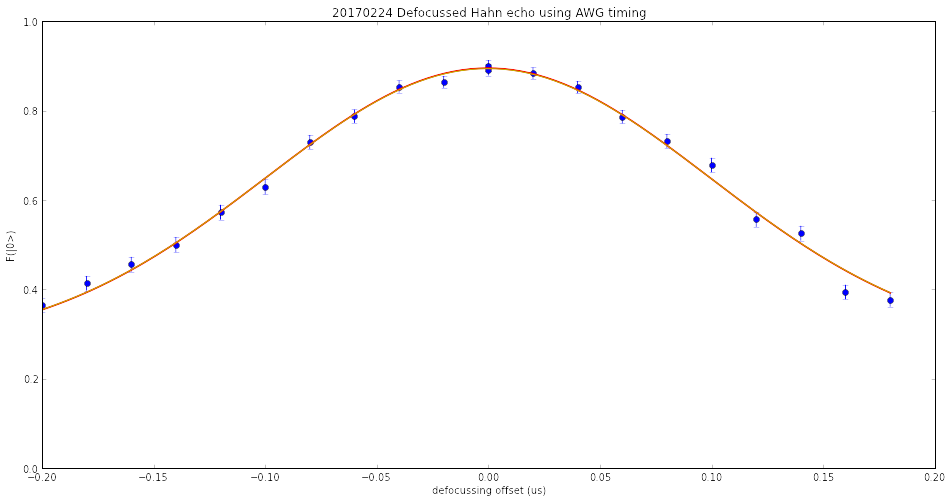

In [31]:
fig = plt.figure(figsize=(16,8))



cutout_AWGT = (stitched_AWGT_sweep_pts > -cutout_width/2) & (stitched_AWGT_sweep_pts < cutout_width/2)

x_AWGT = stitched_AWGT_sweep_pts[cutout_AWGT]
y_AWGT = stitched_AWGT_p0[cutout_AWGT]
u_y_AWGT = stitched_AWGT_u_p0[cutout_AWGT]

plt.errorbar(x_AWGT, y_AWGT, fmt='o', yerr=u_y_AWGT)
plt.ylim(0,1)

fit_result_gauss_AWGT = fit_refocussing_gaussian(x_AWGT, y_AWGT, 
                               A_guess=0.5, t0_guess=0.0, sigma_guess=0.1)
fit_result_parabola_AWGT = fit_refocussing_parabola(x_AWGT, y_AWGT, 
                                                    A0_guess =0.9, t0_guess=0.0, A2_guess=30)

plot.plot_fit1d(fit_result_gauss_AWGT, np.linspace(x_AWGT[0], x_AWGT[-1], 201), ax=plt.gca(), plot_data=False, print_info=False)
# plot.plot_fit1d(fit_result_parabola_AWGT, np.linspace(x_AWGT[0],x_AWGT[-1], 201), ax=plt.gca(), plot_data=False, print_info=False, color='b')

A_AWGT = fit_result_gauss_AWGT['params_dict']['A']
bl_AWGT = fit_result_gauss_AWGT['params_dict']['bl']
sigma_AWGT = fit_result_gauss_AWGT['params_dict']['sigma']
t0_AWGT = fit_result_gauss_AWGT['params_dict']['t0']

A2_parabola_AWGT = fit_result_parabola_AWGT['params_dict']['A2']

def parabola_AWGT(t):
    return -(A_AWGT / sigma_AWGT**2) * (t-t0_AWGT)**2 + A_AWGT + bl_AWGT

parabola_x = np.linspace(x_AWGT[0], x_AWGT[-1], 201)

jitter_reduction_parabola = A2_parabola_AWGT * (t_j)**2 / 12.0
clean_ampl_gauss = fit_result_gauss_AWGT['fitfunc'](t0_AWGT)
jitter_ampl_gauss = jitter_window_convoluted_gaussian(t0_AWGT, 
                                                       t0=t0_AWGT, A0=A_AWGT, t_j=t_j, sigma=sigma_AWGT) +  bl_AWGT
jitter_reduction_gauss = clean_ampl_gauss - jitter_ampl_gauss

print("Fitted AWG timing amplitude: {}".format(clean_ampl_gauss))
# print("Reduction in amplitude due to jitter (parabola approximation): {}".format(jitter_reduction_parabola))
print("Reduction in amplitude due to jitter (Gaussian approximation): {}".format(jitter_reduction_gauss))


# plt.plot(parabola_x, parabola_AWGT(parabola_x))
# plt.plot(parabola_x, parabola_AWGT(parabola_x) - jitter_reduction_parabola)
plt.plot(parabola_x, jitter_window_convoluted_gaussian(parabola_x, 
                                                       t0=t0_AWGT, A0=A_AWGT, t_j=t_j, sigma=sigma_AWGT) + bl_AWGT, color='y')

plt.title('20170224 Defocussed Hahn echo using AWG timing')
plt.xlabel('defocussing offset (us)')
plt.ylabel('F(|0>)')

print('Gaussian fit params: {}'.format(fit_result_gauss_AWGT['params_dict']))
#print(fit_result_parabola_AWGT['params_dict'])

Rule of thumb for amplitude reduction due to jitter:
- assuming a gaussian profile of height 0.5 plusbaseline 0.5
- approximating around t0 with a parabola
- convoluting with a uniform jitter window
- using FWHM = 2.355 * sigma

5.55 / 24 * (t_j / FWHM)^2

In [24]:
def reduction_rule_of_thumb(t_j, FWHM):
    return 5.55/24 * (t_j/FWHM)**2

FWHM = 2.355 * sigma_AWGT

rot_result = reduction_rule_of_thumb(t_j, FWHM)

print("Rule of thumb result for jitter reduction, based on AWG timing results: ")
print("FWHM:\t{} us".format(FWHM))
print("t_j:\t{} ns".format(t_j*1e3))
print("ROT:\t{}".format(rot_result))

Rule of thumb result for jitter reduction, based on AWG timing results: 
FWHM:	0.234645076337 us
t_j:	20.0 ns
ROT:	0.00168003698067


Maximum found at offset -2.92 us
Fitted delayline timing amplitude: 0.890268850949
{'A': 0.60025136757487618, 'bl': 0.29001748337370364, 'sigma': 0.097593208031777165, 't0': -2.9496559347640772}


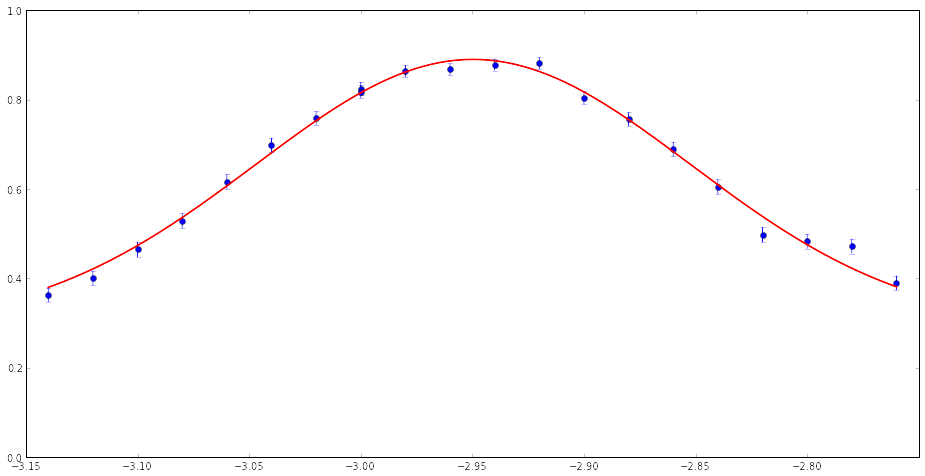

In [32]:
fig = plt.figure(figsize=(16,8))

max_idx = np.argmax(stitched_DELAYT_p0)
max_offset = stitched_DELAYT_sweep_pts[max_idx]
print('Maximum found at offset {} us'.format(max_offset))

max_offset = -2.95

cutout_DELAYT = (stitched_DELAYT_sweep_pts > max_offset - cutout_width/2) & (stitched_DELAYT_sweep_pts < max_offset + cutout_width/2)

x_DELAYT = stitched_DELAYT_sweep_pts[cutout_DELAYT]
y_DELAYT = stitched_DELAYT_p0[cutout_DELAYT]
u_y_DELAYT = stitched_DELAYT_u_p0[cutout_DELAYT]

fit_result_gauss_DELAYT = fit_refocussing_gaussian(x_DELAYT, y_DELAYT, 
                                     A_guess=0.5, t0_guess=max_offset, sigma_guess=0.1)
fit_result_parabola_DELAYT = fit_refocussing_parabola(x_DELAYT, y_DELAYT, 
                                                    A0_guess =0.9, t0_guess=0.0, A2_guess=30)


plt.errorbar(x_DELAYT, y_DELAYT, fmt='o', yerr=u_y_DELAYT)
plot.plot_fit1d(fit_result_gauss_DELAYT, np.linspace(x_DELAYT[0], x_DELAYT[-1], 201), ax=plt.gca(), plot_data=False, print_info=False)
# plot.plot_fit1d(fit_result_parabola_DELAYT, np.linspace(x_DELAYT[0], x_DELAYT[-1], 201), ax=plt.gca(), plot_data=False, print_info=False, color='b')

plt.ylim(0,1)

t0_DELAYT = fit_result_gauss_DELAYT['params_dict']['t0']

delayline_amplitude = fit_result_gauss_DELAYT['fitfunc'](t0_DELAYT)

print("Fitted delayline timing amplitude: {}".format(delayline_amplitude))

print(fit_result_gauss_DELAYT['params_dict'])
# print(fit_result_parabola_DELAYT['params_dict'])

In [26]:
(A_AWGT / sigma_AWGT**2)

62.94589593913831